In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
A=np.random.randint(1,10,(30,100))
print(np.linalg.matrix_rank(A))
x0=np.random.randint(1,10,(100,1))
b=np.dot(A,x0)

30


In [77]:
tot_iter=100
epsilon=1e-10
def f(x):
    #caculate f(x)
    func=np.sum(x*np.log(x))
    return func

def nable_f(x):
    #caculate nable_f(x)
    func=1+np.log(x)
    return func

def nable2_f(x):
    func=np.eye(100)
    for i in range(100):
        func[i,i]=1/x[i]
    return func


def d_nt(x):
    aa=np.zeros((130,130))
    for i in range(100):
        aa[i,i]=1/x[i]
    aa[100:,0:100]=A
    aa[0:100,100:]=np.transpose(A)
    bb=np.zeros((130,1))
    bb[0:100]=-nable_f(x)
    xx=np.linalg.solve(aa,bb)
    d=xx[0:100,:]
    return d

def lam2(x):
    dd=d_nt(x)
    func=np.dot(np.dot(np.transpose(dd),nable2_f(x)),dd)
    return func

def judge(x,arr):
    #save each error of epoch
    #if it is less or equal epsilon, then return false, else return true
    l=0.5*lam2(x)
    arr.append(l)
    if l > epsilon and len(arr)<tot_iter:
        return True
    return False

def good_x(a,b):
    x=x0
    error=[]
    k=0
    while judge(x,error):
        direction=d_nt(x)
        t=1
        while f(x+t*direction)> f(x)-a*t*lam2(x):
            t=b*t
        x=x+t*direction
        
        k=k+1
    
    return x,k,error

In [78]:
alpha=0.1
beta=0.7
x,k,error=good_x(alpha,beta)
while len(error)<100:
    error.append(error[-1])
error=np.array(error).reshape(100)
print(x)
print(f(x))

[[ 5.33537903]
 [ 4.39501327]
 [ 3.53972013]
 [ 6.45758062]
 [ 4.33024519]
 [ 3.7904658 ]
 [ 3.93906079]
 [ 7.96705029]
 [ 4.08890122]
 [ 6.42976812]
 [ 3.91916998]
 [ 5.46333388]
 [ 4.63498797]
 [ 5.0250252 ]
 [ 3.68482081]
 [ 3.66690985]
 [ 1.95441815]
 [ 9.96915626]
 [ 3.4018525 ]
 [10.71722132]
 [ 4.18724637]
 [ 3.71016276]
 [ 5.63256886]
 [ 2.11592055]
 [ 5.47276844]
 [ 6.17790555]
 [ 1.46787318]
 [ 4.54053937]
 [ 5.29777249]
 [ 5.10878256]
 [ 4.74040948]
 [ 4.47506449]
 [ 5.33321996]
 [ 2.16318007]
 [ 5.7095903 ]
 [ 4.23361025]
 [ 1.73097326]
 [ 3.59610191]
 [ 4.16308678]
 [ 5.60206846]
 [ 5.04175089]
 [ 3.97177311]
 [ 4.52901692]
 [ 3.78989716]
 [ 6.25958002]
 [ 2.90883431]
 [ 7.85019868]
 [ 2.08223271]
 [ 7.13225661]
 [ 5.90691772]
 [ 6.45077559]
 [ 8.95128222]
 [ 3.09891762]
 [ 5.7678683 ]
 [ 2.76354488]
 [10.3080704 ]
 [ 6.2154408 ]
 [ 4.00074348]
 [ 4.27270336]
 [ 3.868159  ]
 [ 5.11413154]
 [ 6.10232665]
 [ 6.48368885]
 [ 7.0531141 ]
 [ 5.06605849]
 [ 4.06532279]
 [ 4.63615

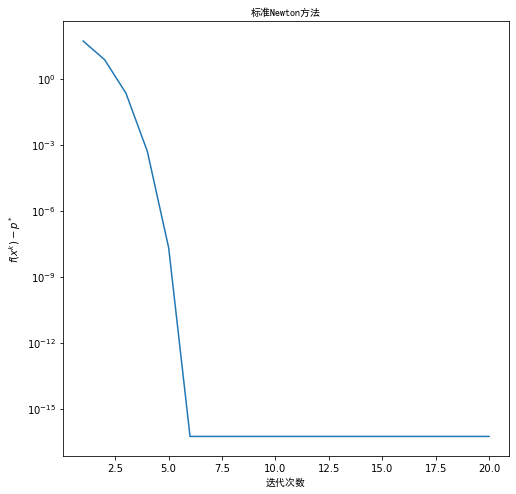

In [80]:
k=np.array([i+1 for i in range(100)])
plt.rcParams['figure.figsize']=(8,8)
plt.plot(k[0:20],error[0:20],label="$\alpha=0.1,\beta=0.7$")
plt.xlabel("迭代次数",fontproperties='simhei')
plt.ylabel("$f(x^k)-p^*$")
plt.title("标准Newton方法",fontproperties='simhei') 
plt.yscale('log')
plt.show()

In [81]:
xx=np.array([1 for i in range(100)]).reshape(100,1)
v0=np.array([0 for i in range(30)]).reshape(30,1)
tot_iter=100
epsilon=1e-10
def f(x):
    #caculate f(x)
    func=np.sum(x*np.log(x))
    return func

def nable_f(x):
    #caculate nable_f(x)
    func=1+np.log(x)
    return func

def nable2_f(x):
    func=np.eye(100)
    for i in range(100):
        func[i,i]=1/x[i]
    return func


def d_nt(x,v):
    aa=np.zeros((130,130))
    for i in range(100):
        aa[i,i]=1/x[i]
    aa[100:,0:100]=A
    aa[0:100,100:]=np.transpose(A)
    bb=np.zeros((130,1))
    bb[0:100]=nable_f(x)+np.dot(np.transpose(A),v)
    bb[100:]=np.dot(A,x)-b
    bb=-bb
    xx=np.linalg.solve(aa,bb)
    d=xx[0:100]
    v=xx[100:]
    return d,v

def dual(x,v):
    r=np.zeros((130,1))
    r[0:100]=nable_f(x)+np.dot(np.transpose(A),v)
    r[100:]=np.dot(A,x)-b
    func=np.sqrt(np.dot(np.transpose(r),r))
    return func

def judge(x,v,arr):
    #save each error of epoch
    #if it is less or equal epsilon, then return false, else return true
    l=dual(x,v)
    arr.append(l)
    if l > epsilon and len(arr)<tot_iter:
        return True
    return False

def good_x(a,b):
    x=xx
    v=v0
    error=[]
    k=0
    while judge(x,v,error):
        dx,dv=d_nt(x,v)
        t=1
        xk=x+t*dx
        vk=v+t*dv
        while dual(xk,vk) > (1-a*t)*dual(x,v):
            t=b*t
        x=xk
        v=vk
        k=k+1
    
    return x,k,error

In [82]:
alpha=0.1
beta=0.7
x,k,error=good_x(alpha,beta)
while len(error)<100:
    error.append(error[-1])
error=np.array(error).reshape(100)
print(f(x))

827.1649429339352


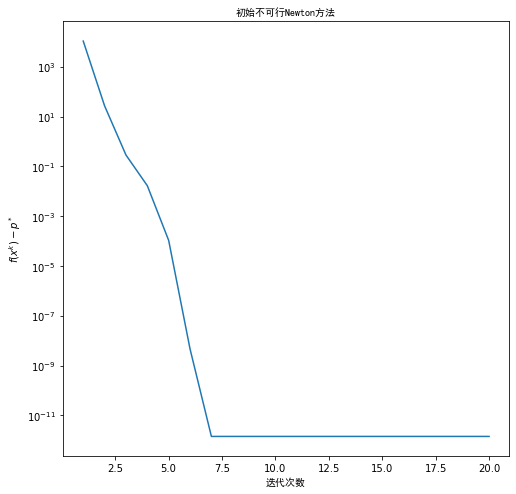

In [83]:
k=np.array([i+1 for i in range(100)])
plt.rcParams['figure.figsize']=(8,8)
plt.plot(k[0:20],error[0:20],label="$\alpha=0.1,\beta=0.7$")
plt.xlabel("迭代次数",fontproperties='simhei')
plt.ylabel("$f(x^k)-p^*$")
plt.title("初始不可行Newton方法",fontproperties='simhei') 
plt.yscale('log')
plt.show()

In [84]:
tot_iter=100
epsilon=1e-10
def f(x):
    #caculate f(x)
    func=np.sum(x*np.log(x))
    return func

def nable_f(x):
    #caculate nable_f(x)
    func=1+np.log(x)
    return func

def nable2_f(x):
    func=np.eye(100)
    for i in range(100):
        func[i,i]=1/x[i]
    return func


def d_nt(x):
    aa=np.zeros((130,130))
    for i in range(100):
        aa[i,i]=1/x[i]
    aa[100:,0:100]=A
    aa[0:100,100:]=np.transpose(A)
    bb=np.zeros((130,1))
    bb[0:100]=nable_f(x)
    bb[100:]=np.dot(A,x)-b
    bb=-bb
    xx=np.linalg.solve(aa,bb)
    d=xx[0:100,:]
    return d

def lam2(x):
    dd=d_nt(x)
    func=np.dot(np.dot(np.transpose(dd),nable2_f(x)),dd)
    return func

def judge(x,arr):
    #save each error of epoch
    #if it is less or equal epsilon, then return false, else return true
    l=0.5*lam2(x)
    arr.append(l)
    if l > epsilon and len(arr)<tot_iter:
        return True
    return False

def good_x(a,b):
    x=x0
    error=[]
    k=0
    while judge(x,error):
        direction=d_nt(x)
        t=1
        while f(x+t*direction)> f(x)-a*t*lam2(x):
            t=b*t
        x=x+t*direction
        
        k=k+1
    
    return x,k,error

In [85]:
alpha=0.1
beta=0.7
x,k,error=good_x(alpha,beta)
while len(error)<100:
    error.append(error[-1])
error=np.array(error).reshape(100)
print(x)
print(f(x))

[[ 5.33537903]
 [ 4.39501327]
 [ 3.53972013]
 [ 6.45758062]
 [ 4.33024519]
 [ 3.7904658 ]
 [ 3.93906079]
 [ 7.96705029]
 [ 4.08890122]
 [ 6.42976812]
 [ 3.91916998]
 [ 5.46333388]
 [ 4.63498797]
 [ 5.0250252 ]
 [ 3.68482081]
 [ 3.66690985]
 [ 1.95441815]
 [ 9.96915626]
 [ 3.4018525 ]
 [10.71722132]
 [ 4.18724637]
 [ 3.71016276]
 [ 5.63256886]
 [ 2.11592055]
 [ 5.47276844]
 [ 6.17790555]
 [ 1.46787318]
 [ 4.54053937]
 [ 5.29777249]
 [ 5.10878256]
 [ 4.74040948]
 [ 4.47506449]
 [ 5.33321996]
 [ 2.16318007]
 [ 5.7095903 ]
 [ 4.23361025]
 [ 1.73097326]
 [ 3.59610191]
 [ 4.16308678]
 [ 5.60206846]
 [ 5.04175089]
 [ 3.97177311]
 [ 4.52901692]
 [ 3.78989716]
 [ 6.25958002]
 [ 2.90883431]
 [ 7.85019868]
 [ 2.08223271]
 [ 7.13225661]
 [ 5.90691772]
 [ 6.45077559]
 [ 8.95128222]
 [ 3.09891762]
 [ 5.7678683 ]
 [ 2.76354488]
 [10.3080704 ]
 [ 6.2154408 ]
 [ 4.00074348]
 [ 4.27270336]
 [ 3.868159  ]
 [ 5.11413154]
 [ 6.10232665]
 [ 6.48368885]
 [ 7.0531141 ]
 [ 5.06605849]
 [ 4.06532279]
 [ 4.63615

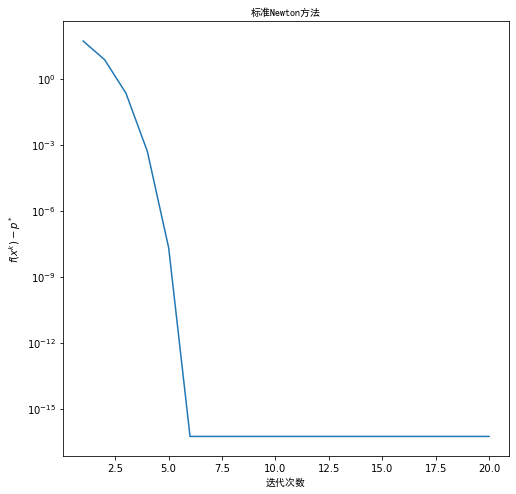

In [86]:
k=np.array([i+1 for i in range(100)])
plt.rcParams['figure.figsize']=(8,8)
plt.plot(k[0:20],error[0:20],label="$\alpha=0.1,\beta=0.7$")
plt.xlabel("迭代次数",fontproperties='simhei')
plt.ylabel("$f(x^k)-p^*$")
plt.title("标准Newton方法",fontproperties='simhei') 
plt.yscale('log')
plt.show()